Exploratory Analysis: Visualizations
- Prices vs Total Distance Traveled 
- Distribution of Tickets Bought per Origin Airport
- Distribution of Tickets Bought per Destination Airport
- Correlation Matrix between all Numerical Variables

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the data
chunksize=10000
df = pd.read_csv('/Users/kaylienguyen/Downloads/itineraries.csv', chunksize = chunksize)
print('Successfully read csv')

Successfully read csv


In [5]:
#Display a chunk of the data. I will be working with only 10,000 rows of data. Note: this may affect our results, however, it was randomized
#to eliminate bias. 
chunked_df = next(df)
chunked_df = chunked_df.sample(frac=1, random_state=42)
display(chunked_df)
print(chunked_df.info())

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
26252,5c27d82e88b63e764d8481cb8ef6d168,2022-04-16,2022-04-19,SFO,DFW,UA0NA0BC,PT6H16M,0,True,False,...,1650411240||1650428760,2022-04-19T16:34:00.000-07:00||2022-04-19T23:2...,LAX||DFW,SFO||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A320,5040||10440,339||1238,coach||coach
24684,dad9a7de8fcd30f8a48b9626fe0ccbfa,2022-04-16,2022-04-19,ORD,ATL,TA0NX0BQ,PT6H14M,0,True,False,...,1650403740||1650418320,2022-04-19T17:29:00.000-04:00||2022-04-19T21:3...,LGA||ATL,ORD||LGA,Delta||Delta,DL||DL,Airbus A220-100||Airbus A320,7860||9360,720||762,coach||coach
21731,cd6f24a16e0b79321cf9f95283080857,2022-04-16,2022-04-19,JFK,LAX,V3AHZNN1,PT8H55M,0,False,False,...,1650409560||1650421440,2022-04-19T16:06:00.000-07:00||2022-04-19T19:2...,PHX||LAX,JFK||PHX,American Airlines||American Airlines,AA||AA,Boeing 737-800||Airbus A320,20220||5100,2139||370,coach||coach
24742,daaa857dea17487d9c0526a34faa4cff,2022-04-16,2022-04-19,ORD,BOS,KAA3AHBS,PT5H43M,0,True,False,...,1650409140||1650421440,2022-04-19T18:59:00.000-04:00||2022-04-19T22:2...,EWR||BOS,ORD||EWR,United||United,UA||UA,Boeing 737-800||Boeing 737-900,8280||5100,720||185,coach||coach
24521,37c9d74215cd15d85c8d8698f85a15db,2022-04-16,2022-04-19,OAK,LGA,KA0NA0MC,PT10H32M,0,False,False,...,1650380100||1650392100||1650410940,2022-04-19T08:55:00.000-06:00||2022-04-19T12:1...,SLC||DEN||LGA,OAK||SLC||DEN,Delta||United||United,DL||UA||UA,Embraer 175 (Enhanced Winglets)||Canadair Regi...,7080||5640||13440,588||380||1621,coach||coach||coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25734,bce9651da9e5ea7b0f2eea49e116e432,2022-04-16,2022-04-19,PHL,EWR,G3AIZNN1,PT10H57M,0,False,False,...,1650371400||1650401820,2022-04-19T07:30:00.000-05:00||2022-04-19T16:5...,ORD||EWR,PHL||ORD,American Airlines||American Airlines,AA||AA,Boeing 737-800||Boeing 737 MAX 8,9000||7260,672||720,coach||coach
25191,272a03ff992485cbcf5713e9f885f0a8,2022-04-16,2022-04-19,ORD,LAX,L3AHZNN1,PT8H44M,0,False,False,...,1650398280||1650416340,2022-04-19T12:58:00.000-07:00||2022-04-19T17:5...,PHX||ONT,ORD||PHX,American Airlines||American Airlines,AA||AA,Boeing 737-800||Airbus A319,13380||4560,1440||347,coach||coach
25390,195425d40c44eb4df250f139730016d7,2022-04-16,2022-04-19,ORD,PHL,VAA3AKEN,PT2H9M,1,False,False,...,1650428340,2022-04-20T00:19:00.000-04:00,PHL,ORD,United,UA,Airbus A319,7740,672,coach
20860,384cebf33928192438d8301122716ac8,2022-04-16,2022-04-19,EWR,IAD,V0AZZNN1,PT5H14M,0,False,False,...,1650389700||1650401640,2022-04-19T13:35:00.000-04:00||2022-04-19T16:5...,CLT||IAD,EWR||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Canadair Regional Jet 900,6900||5040,545||327,coach||coach


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 26252 to 27270
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   legId                              10000 non-null  object 
 1   searchDate                         10000 non-null  object 
 2   flightDate                         10000 non-null  object 
 3   startingAirport                    10000 non-null  object 
 4   destinationAirport                 10000 non-null  object 
 5   fareBasisCode                      10000 non-null  object 
 6   travelDuration                     10000 non-null  object 
 7   elapsedDays                        10000 non-null  int64  
 8   isBasicEconomy                     10000 non-null  bool   
 9   isRefundable                       10000 non-null  bool   
 10  isNonStop                          10000 non-null  bool   
 11  baseFare                           10000 non-null  floa

In [12]:
# Prepping for graphs
df_graphs = chunked_df[['legId', 'baseFare', 'startingAirport', 'destinationAirport', 'totalTravelDistance']].copy()
display(df_graphs.head())
print(df_graphs.info())

,legId,baseFare,startingAirport,destinationAirport,totalTravelDistance
26252,5c27d82e88b63e764d8481cb8ef6d168,147.91,SFO,DFW,1577.0
24684,dad9a7de8fcd30f8a48b9626fe0ccbfa,117.21,ORD,ATL,1482.0
21731,cd6f24a16e0b79321cf9f95283080857,222.33,JFK,LAX,2509.0
24742,daaa857dea17487d9c0526a34faa4cff,50.23,ORD,BOS,905.0
24521,37c9d74215cd15d85c8d8698f85a15db,525.58,OAK,LGA,2589.0


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 26252 to 27270
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   legId                10000 non-null  object 
 1   baseFare             10000 non-null  float64
 2   startingAirport      10000 non-null  object 
 3   destinationAirport   10000 non-null  object 
 4   totalTravelDistance  9569 non-null   float64
dtypes: float64(2), object(3)
memory usage: 726.8+ KB
None


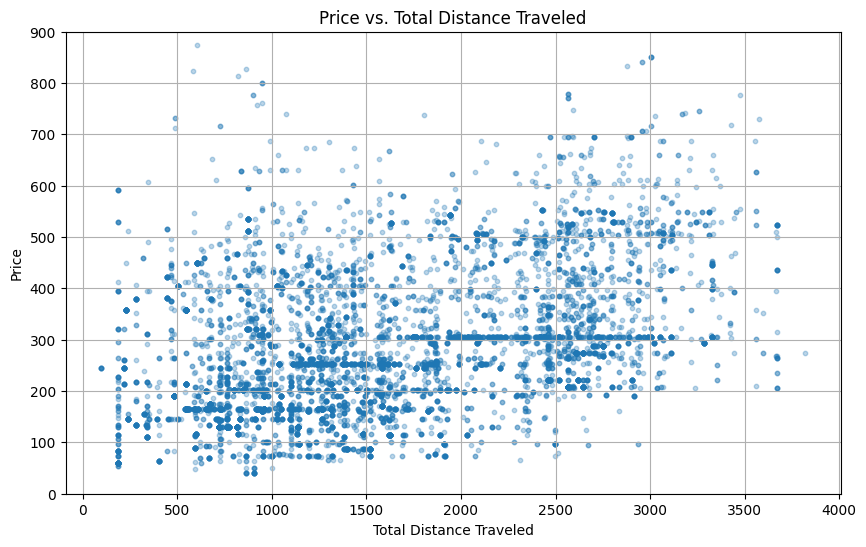

In [27]:
# graph 1: price vs total distance traveled
plt.figure(figsize= (10,6))
plt.scatter(df_graphs['totalTravelDistance'], df_graphs['baseFare'], alpha=.3, s=10)
plt.title('Price vs. Total Distance Traveled')
plt.xlabel('Total Distance Traveled')
plt.ylabel('Price')
plt.ylim(0,900)
plt.grid(True)
plt.show()


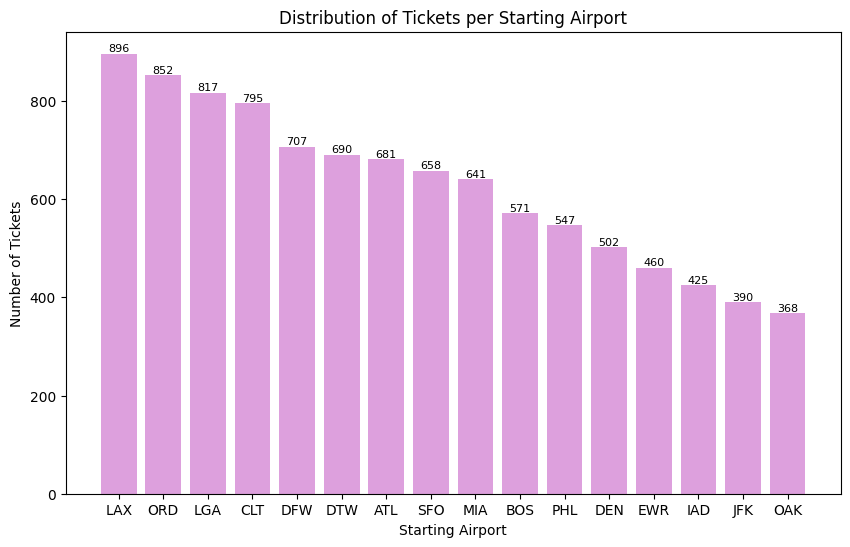

In [41]:
# graph 2: distribution of tickets bought per origin airport
starting_counts = df_graphs['startingAirport'].value_counts()
plt.figure(figsize=(10,6))
bars = plt.bar(starting_counts.index, starting_counts.values, color='plum')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, color='black')
plt.title('Distribution of Tickets per Starting Airport')
plt.xlabel('Starting Airport')
plt.ylabel('Number of Tickets')
plt.show()

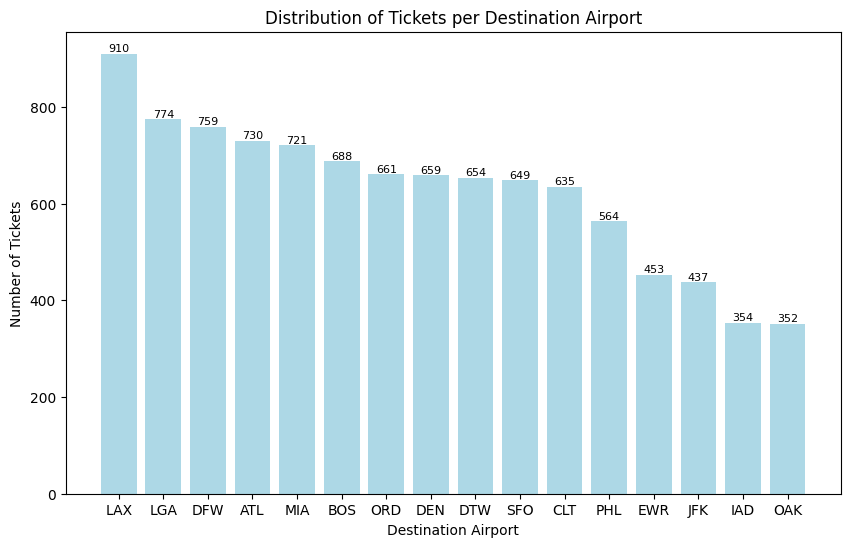

In [40]:
# graph 3: distribution of tickets bought per destination airport
end_counts = df_graphs['destinationAirport'].value_counts()
plt.figure(figsize=(10,6))
bars = plt.bar(end_counts.index, end_counts.values, color='lightblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, color='black')
plt.title('Distribution of Tickets per Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Tickets')
plt.show()

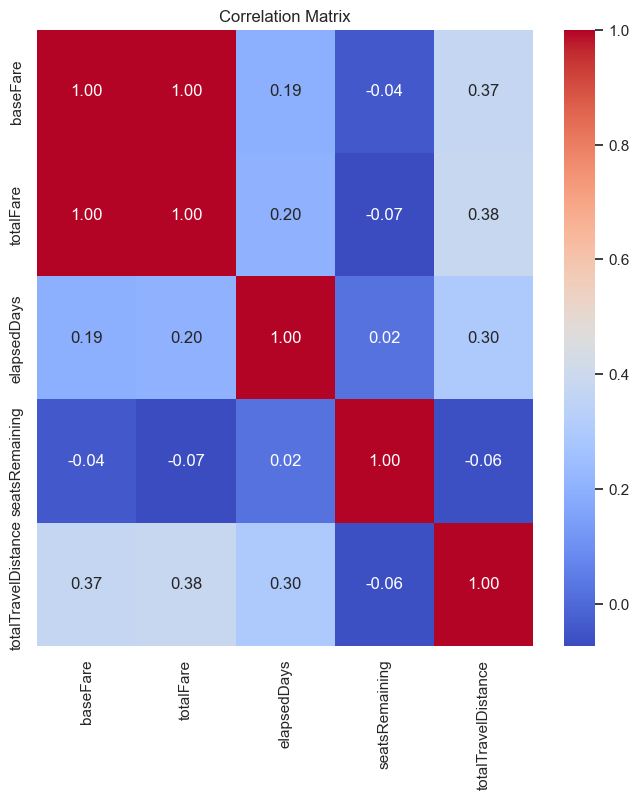

In [50]:
# graph 4: correlation matrix for all numerical variables
columns = ['baseFare', 'totalFare', 'elapsedDays', 'seatsRemaining', 'totalTravelDistance']
subset_df = chunked_df[columns]
corr_matrix = subset_df.corr()

plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

,isNonStop,baseFare
0,False,289.169907
1,True,243.494353


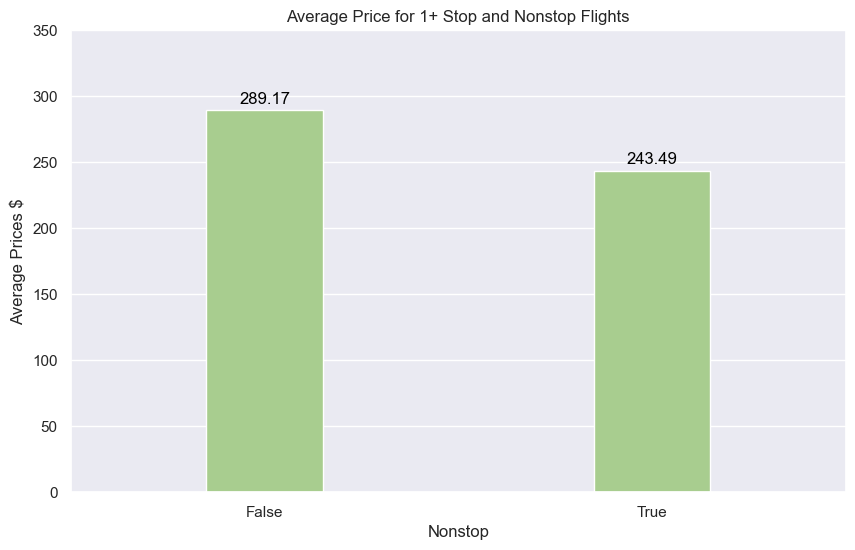

In [78]:
avgPriceNonStop = chunked_df.groupby('isNonStop')['baseFare'].mean().reset_index()
display(avgPriceNonStop)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='isNonStop', y ='baseFare', data=avgPriceNonStop, width = .3, color='#A6D785')
for index, row in avgPriceNonStop.iterrows():
    ax.text(index, row['baseFare'] + 5, str(round(row['baseFare'], 2)), color='black', ha='center')
plt.ylim(0,350)
plt.title('Average Price for 1+ Stop and Nonstop Flights')
plt.xlabel('Nonstop')
plt.ylabel('Average Prices $')
plt.show()

,isBasicEconomy,baseFare
0,False,287.333901
1,True,154.760927


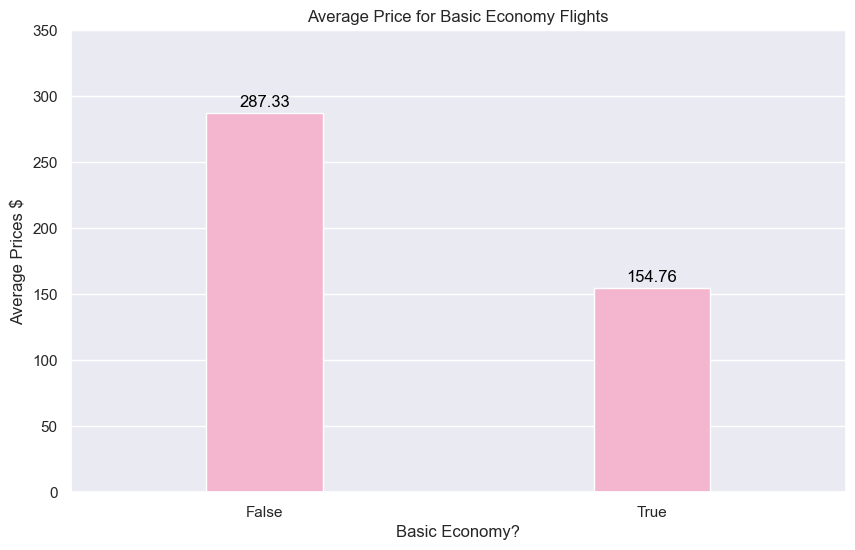

In [81]:
avgPriceEconomy= chunked_df.groupby('isBasicEconomy')['baseFare'].mean().reset_index()
display(avgPriceEconomy)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='isBasicEconomy', y ='baseFare', data=avgPriceEconomy, width = .3, color='#FFAACC')
for index, row in avgPriceEconomy.iterrows():
    ax.text(index, row['baseFare'] + 5, str(round(row['baseFare'], 2)), color='black', ha='center')
plt.ylim(0,350)
plt.title('Average Price for Basic Economy Flights')
plt.xlabel('Basic Economy?')
plt.ylabel('Average Prices $')
plt.show()

